In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#os.environ['HDF5_DISABLE_VERSION_CHECK']='True'

import pandas as pd

import numpy as np

from scipy import stats
from scipy.stats import ttest_ind

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

dv = 'REACTION_TIME'  # options {'percentile', 'REACTION_TIME'}

only_same_trials = False


### Read in the behavioral data

In [2]:
# load in the pre-processed behavioral data 
df_beh_c = pd.read_excel("./datasets/dataset_grouping/df_beh_c.xls") 

# subject data per trial 
df_test = pd.read_excel("./datasets/dataset_grouping/test_data_grouping_with_mean_beh.xls")  

df_comp = df_test.copy()
df_comp

,image_id,img_id,img_name,same_diff,close_far,first_dot_xy,second_dot_xy,same_object_anns_ind,diff_object_anns_ind,distance,img_shape,subs_mean_rt,subs_mean_p
0,16,289393,000000289393.jpg,same,close,"[316, 251]","[210, 276]",2,1,108.908218,"(480, 640, 3)",773.615385,34.473160
1,16,289393,000000289393.jpg,diff,close,"[316, 251]","[221, 204]",2,1,105.990566,"(480, 640, 3)",917.538462,61.495698
2,16,289393,000000289393.jpg,same,far,"[316, 251]","[114, 262]",2,1,202.299283,"(480, 640, 3)",716.307692,40.940762
3,16,289393,000000289393.jpg,diff,far,"[316, 251]","[135, 155]",2,1,204.882893,"(480, 640, 3)",993.176471,65.961102
4,26,153299,000000153299.jpg,same,close,"[237, 264]","[206, 165]",1,0,103.740060,"(500, 461, 3)",1132.909091,71.109335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,4971,553788,000000553788.jpg,diff,far,"[317, 181]","[503, 257]",1,2,200.927848,"(363, 640, 3)",816.266667,43.723299
1016,4998,394940,000000394940.jpg,same,close,"[213, 320]","[110, 285]",3,2,108.784190,"(640, 426, 3)",721.083333,31.122659
1017,4998,394940,000000394940.jpg,diff,close,"[213, 320]","[261, 415]",3,2,106.437775,"(640, 426, 3)",955.437500,58.665428
1018,4998,394940,000000394940.jpg,same,far,"[213, 320]","[171, 123]",3,2,201.427406,"(640, 426, 3)",790.444444,34.780002


### Reaction time and percentile analyses over trials 

In [3]:
# plot average RTs for each condition

def beh_summ(dv):
    
    summ_rts = []
    for cf in ['close', 'far']:
        for sd in ['same', 'diff']:

            df_comp_cond = df_comp[(df_comp['close_far']==cf) & (df_comp['same_diff']==sd)]
            #print(sd, cf, df_comp_cond['model_pred'].mean(), df_comp_cond['model_pred'].sem())
            summ =  df_comp_cond[dv].mean(), df_comp_cond[dv].sem()
            summ_rts.append(summ)

            print(sd, cf,summ)

    summ_rts = np.array(summ_rts)
    
    return summ_rts

def plt_summ(summ_rts, ylim):
    
    fig = plt.figure(figsize=(4, 4))

    labels = ['Same', 'Different']
    close_means = summ_rts[0:2,0]
    close_ses = summ_rts[0:2,1]

    far_means = summ_rts[2:4,0]
    far_ses = summ_rts[2:4,1]


    x =np.array([0, 1.5])  # the label locations
    width = 0.5  # the width of the bars

    plt.rcParams.update({'font.size': 18})

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, close_means, width, label='Close', edgecolor = 'black', color = ['lightgreen', 'lightblue'], yerr=close_ses, capsize=3)

    rects2 = ax.bar(x + width/2, far_means, width, label='Far', edgecolor = 'black', color =['green', 'steelblue'], yerr=far_ses, capsize=3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Reaction time (ms)')
    ax.set_title('')
    ax.set_xticks(x)  # , labels=labels
    ax.set_xticklabels(labels)
    #ax.legend() 
    ax.set_ylim(ylim) #(35, 60)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)

    plt.tight_layout()
    plt.show()
    
    #fig.savefig("figures/humans_rt_poster.png", bbox_inches='tight', dpi=300)

using reaction time
same close (841.7394992736595, 7.261267104129837)
diff close (921.8754929785425, 7.712137595970863)
same far (873.8234954343156, 7.21876384115028)
diff far (922.2363818198904, 8.081642706918323)


<Figure size 400x400 with 0 Axes>

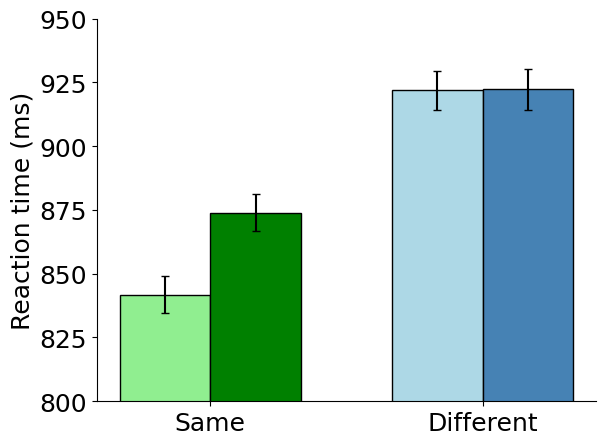

In [4]:
print("using reaction time")

summ_rts = beh_summ('subs_mean_rt')
plt_summ(summ_rts, (800,950))


# print("using percentile")
# summ_rts = beh_summ('subs_mean_p')
# plt_summ(summ_rts, (40,60))

#fig.savefig("figures/rt_conds_nolegends.png", bbox_inches='tight', dpi=300)

### Quantify Subject-Subject agreement  

In [11]:
# n/2 vs n/2 correlation

sub_corr = []

df_comp = df_test.copy()

if only_same_trials:
    df_comp = df_comp[df_comp['same_diff'] == 'same']

sub_ids = df_beh_c['RECORDING_SESSION_LABEL'].unique()

dv = 'REACTION_TIME'  # options {'percentile', 'REACTION_TIME'}

for s in range(50): # do 20 different half splits 

    sub_cols = ['subs_1', 'subs_2']
    
    sub_ids = np.random.permutation(sub_ids)
    
    subs_1, subs_2 = np.split(sub_ids,2) # np.array_split(sub_ids, [25])  # [2]

    for s in range(len(sub_cols)):
        df_comp[sub_cols[s]] = -1

    for t in range(len(df_comp)):

        img_id = df_comp['img_id'].iloc[t]
        sd = df_comp['same_diff'].iloc[t]
        cf = df_comp['close_far'].iloc[t]

        df_t = df_beh_c[(df_beh_c['img_id']==img_id) & (df_beh_c['same_diff']==sd) \
                    & (df_beh_c['close_far']==cf) & (df_beh_c['RECORDING_SESSION_LABEL'].isin(subs_1))]

        if not df_t.empty:
            df_comp[sub_cols[0]].iloc[t] = df_t[dv].mean() 
            
        df_t = df_beh_c[(df_beh_c['img_id']==img_id) & (df_beh_c['same_diff']==sd) \
                    & (df_beh_c['close_far']==cf) & (df_beh_c['RECORDING_SESSION_LABEL'].isin(subs_2))]

        if not df_t.empty:
            df_comp[sub_cols[1]].iloc[t] = df_t[dv].mean() 


    df_comp_soa = df_comp[df_comp['subs_1'] != -1]
    df_comp_soa = df_comp_soa[df_comp_soa['subs_2'] != -1]

    split_corr = stats.spearmanr(df_comp_soa['subs_1'], df_comp_soa['subs_2'])
    
    #split_corr = df_comp_soa[soa].corr(df_comp_soa['subs_2'])
    
    sub_corr.append(split_corr[0])

    print(split_corr)
    
print('average: ', np.array(sub_corr).mean(), '    std: ',  np.array(sub_corr).std(), '    sem: ',  stats.sem(np.array(sub_corr)))

SpearmanrResult(correlation=0.4580415007686599, pvalue=6.105695898934522e-54)
SpearmanrResult(correlation=0.34970653219983067, pvalue=1.182587899607027e-30)
SpearmanrResult(correlation=0.41586853064632195, pvalue=6.332263167541542e-44)
SpearmanrResult(correlation=0.35821818342616274, pvalue=3.038455888340166e-32)
SpearmanrResult(correlation=0.43641558097167366, pvalue=1.1219212486433378e-48)
SpearmanrResult(correlation=0.4510130390122134, pvalue=2.950469678996662e-52)
SpearmanrResult(correlation=0.46059196828059834, pvalue=1.1919003767502683e-54)
SpearmanrResult(correlation=0.4221645072305315, pvalue=2.400754275183345e-45)
SpearmanrResult(correlation=0.409283543873046, pvalue=1.8028789324438708e-42)
SpearmanrResult(correlation=0.42194406187641936, pvalue=2.974449866458625e-45)
SpearmanrResult(correlation=0.4733248999177522, pvalue=5.079937698327529e-58)
SpearmanrResult(correlation=0.3472958222796318, pvalue=2.763765160428501e-30)
SpearmanrResult(correlation=0.4136055898139618, pvalue=2

In [13]:
# 1 vs n-1 correlation

sub_corr = []

df_comp = df_test.copy()
if only_same_trials:
    df_comp = df_comp[df_comp['same_diff'] == 'same']
    

sub_ids = df_beh_c['RECORDING_SESSION_LABEL'].unique()

dv = 'REACTION_TIME'  # options {'percentile', 'REACTION_TIME'}

for sub_id in sub_ids:

    sub_cols = ['subs_n-1', 'sub_1']

    for s in range(len(sub_cols)):
        df_comp[sub_cols[s]] = - 1


    for t in range(len(df_comp)):

        img_id = df_comp['img_id'].iloc[t]
        sd = df_comp['same_diff'].iloc[t]
        cf = df_comp['close_far'].iloc[t]

        df_t = df_beh_c[(df_beh_c['img_id']==img_id) & (df_beh_c['same_diff']==sd) \
                                & (df_beh_c['close_far']==cf) & (df_beh_c['RECORDING_SESSION_LABEL'] != sub_id)]

        if not df_t.empty:
            df_comp[sub_cols[0]].iloc[t] = df_t[dv].mean()


        df_t = df_beh_c[(df_beh_c['img_id']==img_id) & (df_beh_c['same_diff']==sd) \
                                & (df_beh_c['close_far']==cf) & (df_beh_c['RECORDING_SESSION_LABEL'] == sub_id)]

        if not df_t.empty:
            df_comp[sub_cols[1]].iloc[t] = df_t[dv].mean()


    df_comp_soa = df_comp[df_comp['sub_1'] != -1]
    df_comp_soa = df_comp_soa[df_comp_soa['subs_n-1'] != -1]
    
    #split_corr = df_comp_soa[soa].corr(df_comp_soa['subs_n-1'])
    
    split_corr = stats.spearmanr(df_comp_soa['sub_1'], df_comp_soa['subs_n-1'])
    
    sub_corr.append(split_corr[0])

    print(split_corr)
    
print('average over subjects : ', np.array(sub_corr).mean(), '    std: ',  np.array(sub_corr).std(), '    sem: ',  stats.sem(np.array(sub_corr)))  #[:,0]

SpearmanrResult(correlation=0.31476662201743244, pvalue=4.066971234612661e-06)
SpearmanrResult(correlation=0.3293456978692005, pvalue=2.1154512061217622e-07)
SpearmanrResult(correlation=0.20553937197736688, pvalue=0.003851594019677651)
SpearmanrResult(correlation=0.18522574570043537, pvalue=0.011150695984694417)
SpearmanrResult(correlation=0.11716154655933841, pvalue=0.10743001947447332)
SpearmanrResult(correlation=0.22220027885189356, pvalue=0.000747464471754899)
SpearmanrResult(correlation=0.4297108625799979, pvalue=5.601503686653916e-12)
SpearmanrResult(correlation=0.41335050449338445, pvalue=4.103524262555308e-11)
SpearmanrResult(correlation=0.19297218376394856, pvalue=0.004239775369124549)
SpearmanrResult(correlation=0.3409101397506954, pvalue=2.807269036855941e-07)
SpearmanrResult(correlation=0.3653441228430655, pvalue=6.780510633668787e-09)
SpearmanrResult(correlation=0.29144177240774555, pvalue=6.875785645775642e-05)
SpearmanrResult(correlation=0.36244870069710455, pvalue=1.050

### analyses of easy and hard trials 

In [15]:
# subject data per trial 
df_test = pd.read_excel("./datasets/dataset_grouping/test_data_grouping_with_mean_beh.xls")  

df_comp = df_test.copy()
df_comp

#df = self.df_test.iloc[0]
# fig = plt.figure(constrained_layout=True, figsize=(25 * 0.7, 8.5 * 0.7))
# # and we add one plot per reference point
# gs = fig.add_gridspec(1, 4)

# obj_mask = obj_masks[step-1]


# img = invTrans(img).movedim(0,-1).cpu().numpy()
# # plt.imshow(image)
# # plt.show()
# ax = plt.subplot(gs[0,0])img_with_dots = plot_dots(np.array(img), dots_coords['coords'])

,image_id,img_id,img_name,same_diff,close_far,first_dot_xy,second_dot_xy,same_object_anns_ind,diff_object_anns_ind,distance,img_shape,subs_mean_rt,subs_mean_p
0,16,289393,000000289393.jpg,same,close,"[316, 251]","[210, 276]",2,1,108.908218,"(480, 640, 3)",773.615385,34.473160
1,16,289393,000000289393.jpg,diff,close,"[316, 251]","[221, 204]",2,1,105.990566,"(480, 640, 3)",917.538462,61.495698
2,16,289393,000000289393.jpg,same,far,"[316, 251]","[114, 262]",2,1,202.299283,"(480, 640, 3)",716.307692,40.940762
3,16,289393,000000289393.jpg,diff,far,"[316, 251]","[135, 155]",2,1,204.882893,"(480, 640, 3)",993.176471,65.961102
4,26,153299,000000153299.jpg,same,close,"[237, 264]","[206, 165]",1,0,103.740060,"(500, 461, 3)",1132.909091,71.109335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,4971,553788,000000553788.jpg,diff,far,"[317, 181]","[503, 257]",1,2,200.927848,"(363, 640, 3)",816.266667,43.723299
1016,4998,394940,000000394940.jpg,same,close,"[213, 320]","[110, 285]",3,2,108.784190,"(640, 426, 3)",721.083333,31.122659
1017,4998,394940,000000394940.jpg,diff,close,"[213, 320]","[261, 415]",3,2,106.437775,"(640, 426, 3)",955.437500,58.665428
1018,4998,394940,000000394940.jpg,same,far,"[213, 320]","[171, 123]",3,2,201.427406,"(640, 426, 3)",790.444444,34.780002


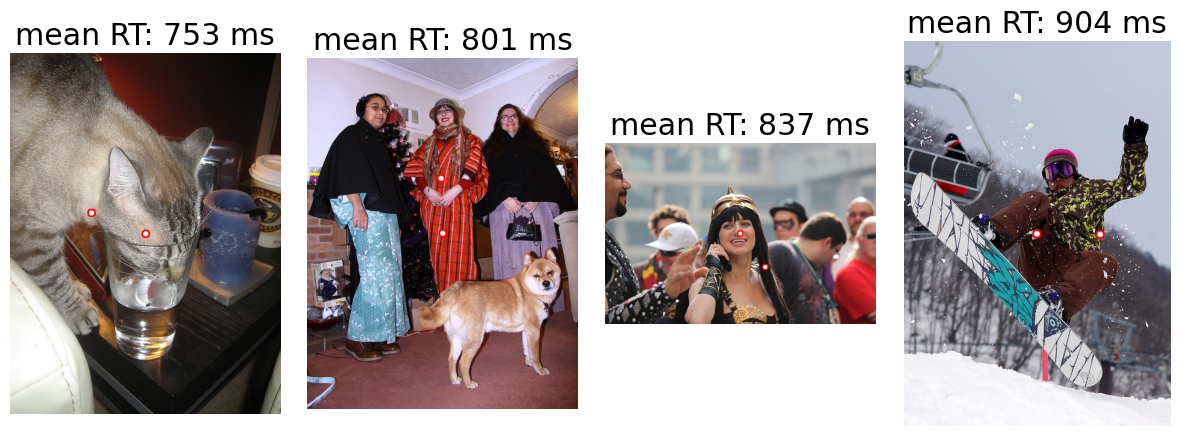

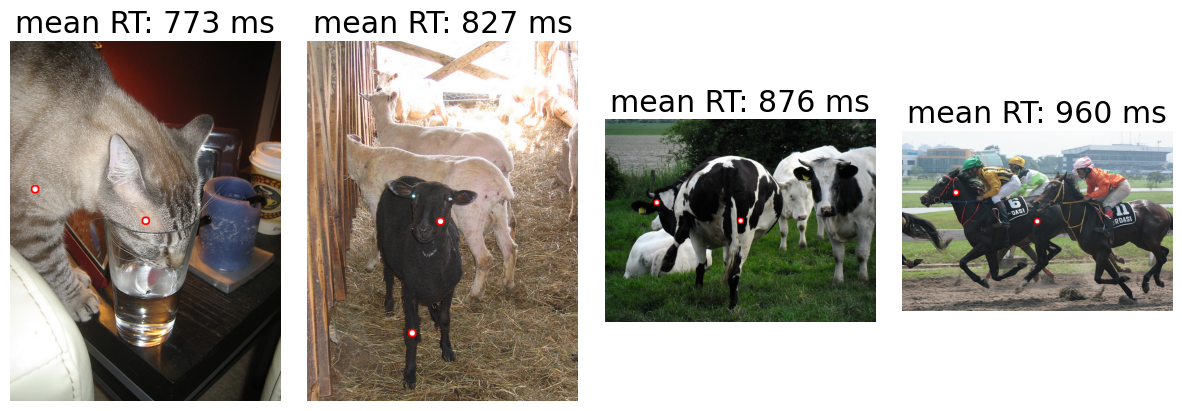

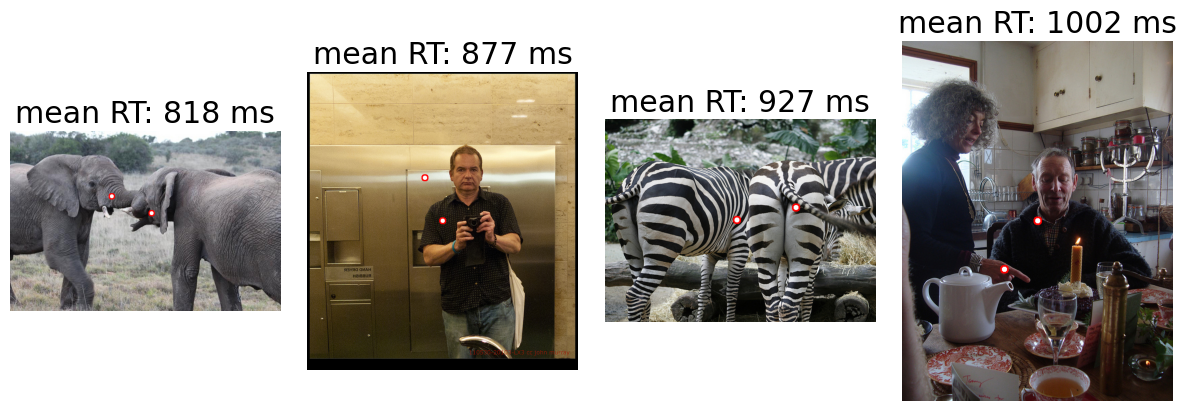

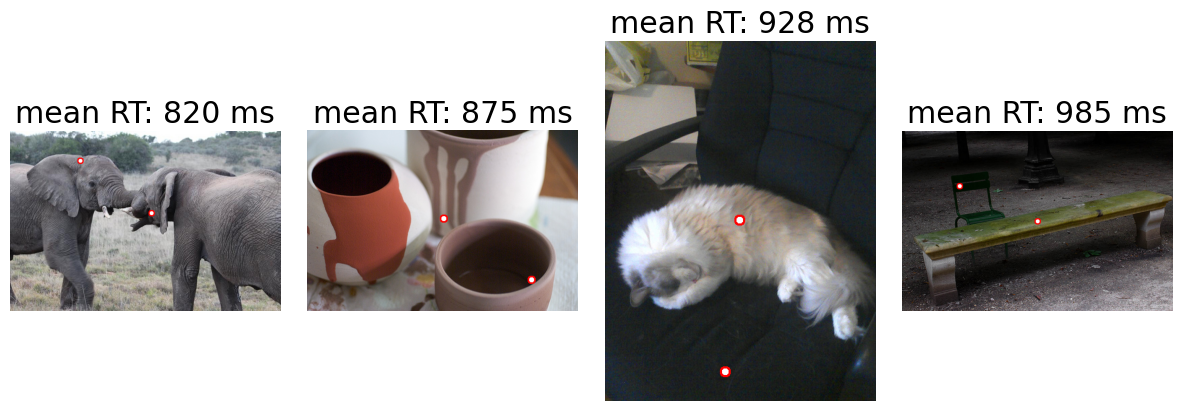

In [63]:
from PIL import Image, ImageOps
from datasets.loaddata_g import *
coco_path='../../data/coco'



trial_inds = [[49, 101, 150, 200], [48, 101, 150, 202], [50, 100, 150, 195], [50, 100, 150, 195]]
cond = 0 
for sd in ['same', 'diff']:
    for cf in ['close', 'far']:
    
        df_comp_cond = df_comp[(df_comp['close_far']==cf) & (df_comp['same_diff']==sd)]
        #print(sd, cf, df_comp_cond['model_pred'].mean(), df_comp_cond['model_pred'].sem())

        df_comp_cond = df_comp_cond.sort_values(by = 'subs_mean_rt')
        
        fig = plt.figure(figsize=(15, 5))
        # and we add one plot per reference point
        gs = fig.add_gridspec(1, 4)
        fig.subplots_adjust(wspace=0.1, hspace=0.5)

        
        for ind in range(4):
            df_t = df_comp_cond.iloc[trial_inds[cond][ind]]
            img, dots_coords, target = load_image(df_t, 'val2017', coco_path) 
            img_with_dots = plot_dots(np.array(img), dots_coords['coords'])
            
            df_comp.iloc[trial_inds[ind]]
            
            ax = plt.subplot(gs[0,ind])
            ax.imshow(img_with_dots)
            plt.axis('off')

            
            ax.set_title('mean RT: {} ms'.format(int(df_t['subs_mean_rt'])))
            
            
        fig.savefig(f"figures/sample_trials_{sd}_{cf}.png", bbox_inches='tight', dpi=300)    
        cond += 1
        

In [28]:
df_trials = df_comp[df_comp['subs_mean_p'] >70]
df_trials

,image_id,img_id,img_name,same_diff,close_far,first_dot_xy,second_dot_xy,same_object_anns_ind,diff_object_anns_ind,distance,img_shape,subs_mean_rt,subs_mean_p
4,26,153299,000000153299.jpg,same,close,"[237, 264]","[206, 165]",1,0,103.740060,"(500, 461, 3)",1132.909091,71.109335
6,26,153299,000000153299.jpg,same,far,"[237, 264]","[111, 102]",1,0,206.021844,"(500, 461, 3)",1059.142857,70.393847
17,38,443303,000000443303.jpg,diff,close,"[250, 186]","[293, 276]",0,1,99.744674,"(375, 500, 3)",1028.555556,77.822408
25,118,524456,000000524456.jpg,diff,close,"[313, 228]","[278, 133]",2,3,101.242284,"(480, 640, 3)",1047.250000,71.987866
26,118,524456,000000524456.jpg,same,far,"[313, 228]","[121, 170]",2,3,200.569190,"(480, 640, 3)",1056.600000,70.450843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,4750,150417,000000150417.jpg,same,close,"[334, 228]","[350, 131]",0,2,98.310732,"(480, 640, 3)",1082.200000,75.576710
986,4750,150417,000000150417.jpg,same,far,"[334, 228]","[452, 65]",0,2,202.039600,"(480, 640, 3)",1165.230769,87.161366
989,4766,374982,000000374982.jpg,diff,close,"[187, 245]","[294, 243]",9,4,107.018690,"(500, 375, 3)",1026.666667,71.208517
998,4785,368752,000000368752.jpg,same,far,"[248, 304]","[457, 288]",0,7,209.611545,"(640, 480, 3)",1151.625000,75.362829


### 































